<a href="https://colab.research.google.com/github/llzx66/Machine-learning-course/blob/main/hw5_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5: Lab (13 points)

Name: Yi Ren/ Cheng Qu/ Zixuan Liu

Email: yren38@jh.edu/ cqu8@jh.edu / zliu154@jh.edu

Please refer to the PDF description for homework 5 for a detailed description of the goals of this assignment.

You will hand in a PDF of this notebook. Please be sure to clearly answer each question listed at the end of the notebook.

##Setup the code.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##Load the Data

In [ ]:
df = pd.read_csv("BPD_2012_2017.csv")
print(len(df))
# Drop missing values
df = df.dropna(subset=['Longitude', 'Latitude'])
# Show first 3 rows
df.head(3)

276529


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


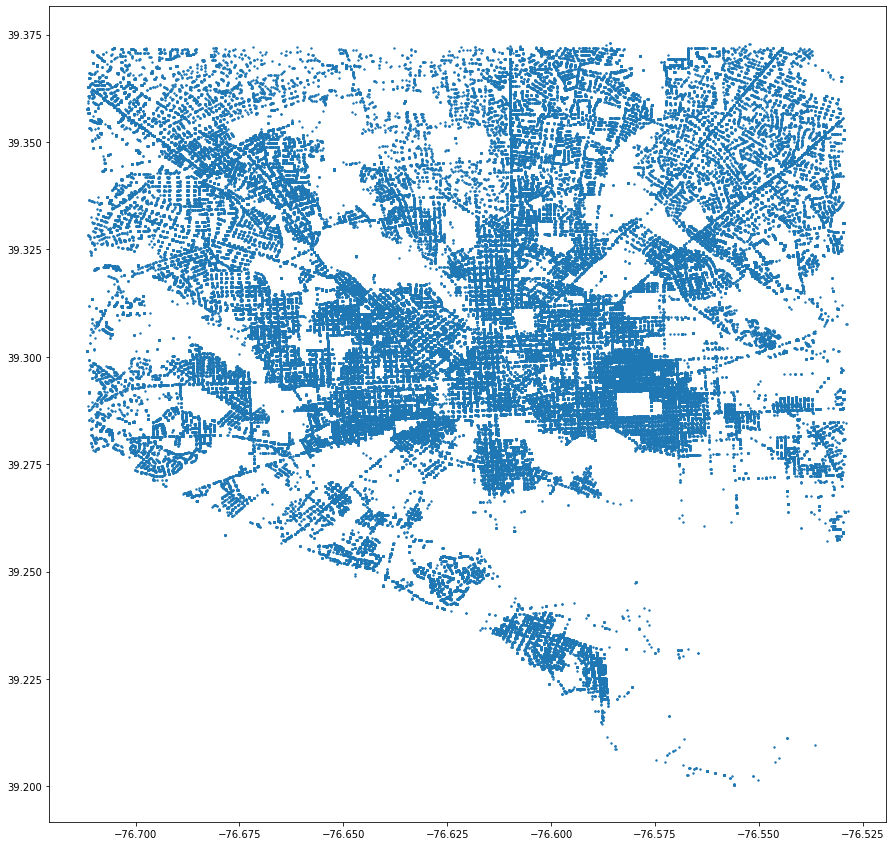

In [ ]:
X = df[['Longitude', 'Latitude']].to_numpy()
# We don't need a test set for this task, so we use the whole dataset as the training set
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], 2)

##Define the K-Means Model (TODO)

In [ ]:
class Kmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def pairwise_distance(self, X, C):
        # Calculate the pairwise Euclidean distance between two numpy arrays X and C
        # X: N x D, i.e. N points in X
        # C: K x D, i.e. K points in C
        # return: N x K
        dists = np.empty([X.shape[0], C.shape[0]])
        for i in range(X.shape[0]):
            for k in range(C.shape[0]):
                dists[i][k] = np.linalg.norm(X[i]-C[k]) 
        return dists
    
    def fit(self, X_train, max_iter=100):
        n_samples = X_train.shape[0]
        
        #########################Step 1##########################
        # 1.1 Assign a random point as the prototype for each cluster
        row, col = X_train.shape
        self.centroids = np.empty([self.n_clusters, col])
        for number in range(self.n_clusters):
            randIndex = np.random.randint(row)
            self.centroids[number] = X_train[randIndex]
        
        # 1.2 Calculate the distance between samples and initial prototypes
        # You may use the self.pairwise_distance function
        cluster_idx = np.empty([row])
        distances = self.pairwise_distance(X_train, self.centroids)

        # 1.3 Assign points to clusters
        cluster_idx = np.argmin(distances, axis=1)
        
        # Start iterative training
        prev_inertia = 0.0
        for n_iter in range(max_iter):
            ######################Step 2#########################
            # Update the prototypes
            cluster_idx = np.empty([row])
            distances = self.pairwise_distance(X_train, self.centroids)
            cluster_idx = np.argmin(distances, axis=1)
            K, D = self.centroids.shape
            new_centroids = np.empty(self.centroids.shape)
            for i in range(K):
                new_centroids[i] = np.mean(X_train[cluster_idx == i], axis = 0)
            self.centroids = new_centroids
                
            ######################Step 3#########################
            # 3.1 Calculate the updated distance between samples and prototypes
            # You may use the self.pairwise_distance function
            dists = self.pairwise_distance(X_train, self.centroids)

            # 3.2 Assign points to clusters
            K = self.centroids.shape[0]
        
            ######################Step 4#########################
            # Calculate the inertia
            inertia = 0.0
            N, D = X_train.shape
            for i in range(N):
                inertia = inertia + np.square(dists[i][cluster_idx[i]])
            if (n_iter+1) % 10 == 0:
                print("#Iteration: ", n_iter, "; inertia: {:.2f}".format(inertia))
                             
            ######################Step 5#########################
            # Check convergence: whether new cluster assignments are the same as previous cluster assignments
            diff = np.abs(prev_inertia - inertia)
            if diff < 1e-4 and diff / prev_inertia < 1e-4:
                print("Converged at iteration {0} with inertia {1:.2f}!".format(str(n_iter), inertia))
                break
            prev_inertia = inertia
        return inertia

    def predict(self, X):
        # Predict the cluster assignments for examples
        # return: an numpy array with the length of X.shape[0]
        distances = self.pairwise_distance(X, self.centroids)
        cluster_ids = np.argmin(distances, axis=1)

        return cluster_ids

##Find the Elbow

In [ ]:
def plot_tune_n_clusters(X_train, max_clusters, max_iter=40):
    inertias = []
    for k in range(max_clusters):
        kmeans = Kmeans(k+1)
        print()
        print("#Cluster: ", (k+1))
        inertias.append(kmeans.fit(X_train, max_iter))
    plt.plot(np.arange(max_clusters) + 1, inertias)
    plt.show()
    return inertias

Q1. (11 points) Show the plot of inertia with number of clusters from 1 to 15. Report which number of clusters is at the elbow.

Please train your K-Means models on a subset of X (X_small) for this question, otherwise it takes too long to finish training. In practice, you may use the whole dataset to select n_cluster, if the computational resources allow.

Select 7 number of clusters. 


#Cluster:  1
Converged at iteration 1 with inertia 72.83!

#Cluster:  2
#Iteration:  9 ; inertia: 39.50
Converged at iteration 12 with inertia 39.50!

#Cluster:  3
#Iteration:  9 ; inertia: 28.18
Converged at iteration 13 with inertia 28.18!

#Cluster:  4
#Iteration:  9 ; inertia: 23.39
Converged at iteration 14 with inertia 23.39!

#Cluster:  5
#Iteration:  9 ; inertia: 17.95
#Iteration:  19 ; inertia: 17.75
Converged at iteration 20 with inertia 17.75!

#Cluster:  6
#Iteration:  9 ; inertia: 15.16
#Iteration:  19 ; inertia: 14.05
Converged at iteration 27 with inertia 13.84!

#Cluster:  7
#Iteration:  9 ; inertia: 11.25
Converged at iteration 16 with inertia 11.23!

#Cluster:  8
#Iteration:  9 ; inertia: 10.56
#Iteration:  19 ; inertia: 10.17
Converged at iteration 21 with inertia 10.17!

#Cluster:  9
#Iteration:  9 ; inertia: 10.37
#Iteration:  19 ; inertia: 10.30
#Iteration:  29 ; inertia: 10.30
#Iteration:  39 ; inertia: 10.09

#Cluster:  10
#Iteration:  9 ; inertia: 8.15
#Iterat

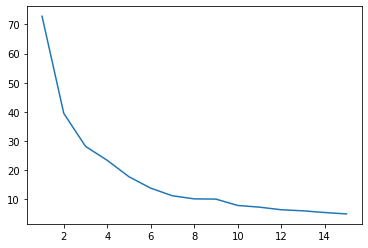

[72.83140246751267,
 39.50173329204765,
 28.182522536526765,
 23.389776520975655,
 17.752541941294833,
 13.83552459609161,
 11.234434598720634,
 10.171080972307449,
 10.087255878809993,
 7.913626753333371,
 7.332068687057584,
 6.43949145054512,
 6.071128215130819,
 5.4863735417133395,
 5.009024254393788]

In [ ]:
X_small = X[np.random.choice(X.shape[0], size=int(X.shape[0]*0.1), replace=False),:]  # Do not change this line of code, you should train kmeans on X_small for this question.
#You might use the plot_tune_n_clusters function

plot_tune_n_clusters(X_small, max_clusters=15)

##Visualization


In [ ]:
def plot_clusters(kmeans, X_train, cluster_ids):
    plt.figure(figsize=(15,15))
    for i in range(np.max(cluster_ids)+1):
        plt.scatter(X_train[cluster_ids == i, 0] , X_train[cluster_ids == i, 1] , s=2, label = i)
        plt.scatter(kmeans.centroids[i,0], kmeans.centroids[i, 1], label=i, s=500, marker="*")
    plt.show()

Q2. (2 points) Train your model with the selected number of clusters in Q1 and  plot the cluster assignments using the *plot_clusters* function.

Train on the whole dataset for this question.

#Iteration:  9 ; inertia: 98.47
#Iteration:  19 ; inertia: 91.02
#Iteration:  29 ; inertia: 90.84
Converged at iteration 36 with inertia 90.83!


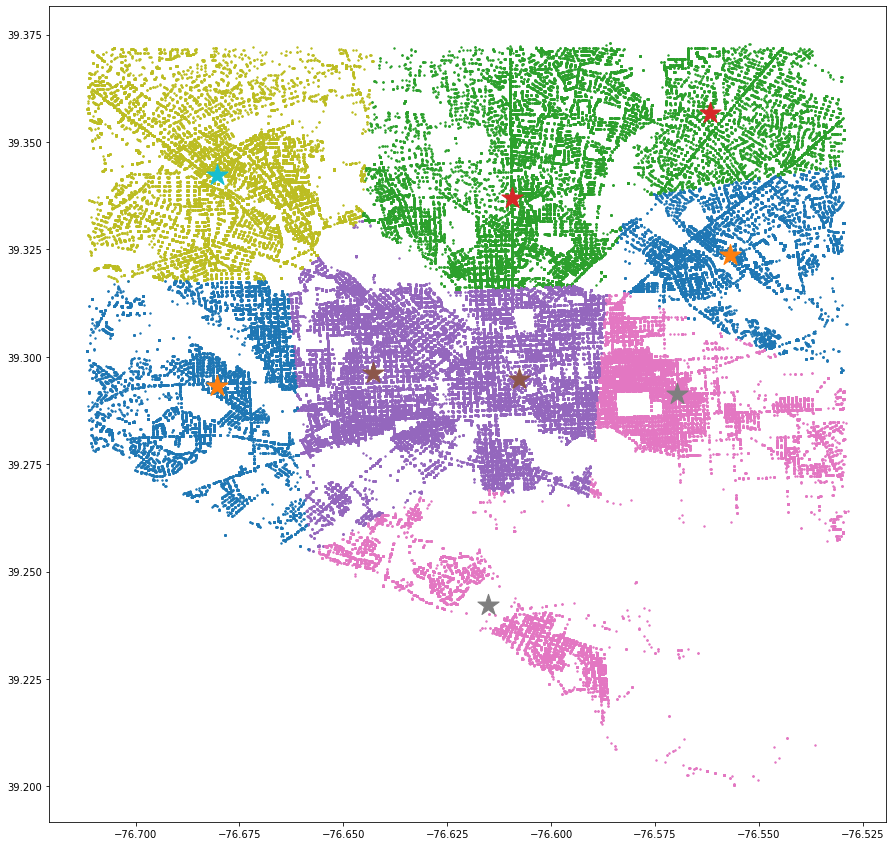

In [ ]:
#You might use the plot_cluster function

kmeans = Kmeans(9)
kmeans.fit(X)
plot_clusters(kmeans, X, kmeans.predict(X))